# CA 4

### The purpose of this project is to learn machine learning methods with Scikit-Learn library.

# Imports

In [1]:
import math
import numpy as np
import pandas as pd
import copy as cp
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import tree
from sklearn import metrics 
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Body

# Phase 0 : Data Analysis

In [2]:
df = pd.read_csv("dataset.csv")

In [3]:
df

,type,title,cast,country,release_year,listed_in,description
0,Movie,Dick Johnson Is Dead,NaN,United States,2020,Documentaries,"As her father nears the end of his life, filmm..."
1,TV Show,Blood & Water,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,TV Show,Ganglands,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,TV Show,Jailbirds New Orleans,NaN,NaN,2021,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,TV Show,Kota Factory,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...
11054,TV Show,X-Men: Evolution,"Noel Fisher, Vincent Gale, Christopher Judge, ...",United States,2000,"Action-Adventure, Animation, Kids",X-Men: Evolution features the team as teenager...
11055,TV Show,Smart Guy,"Tahj Mowry, John Jones, Jason Weaver, Essence ...",United States,1996,"Comedy, Coming of Age, Kids",A genius tries to fit in as a high school soph...
11056,TV Show,Disney Kirby Buckets,"Jacob Bertrand, Mekai Curtis, Cade Sutton, Oli...",United States,2014,"Action-Adventure, Comedy, Coming of Age",Welcome to Kirby's world! It's rude and sketchy.
11057,TV Show,Disney Mech-X4,"Nathaniel Potvin, Raymond Cham, Kamran Lucas, ...",Canada,2016,"Action-Adventure, Comedy, Science Fiction",Ryan discovers his ability to control a giant ...


### As seen above , dataset was loaded successfully.

## 1. Dataset information:

In [4]:
for title in df:
    print("In", title, "column :")
    print(df[title].describe())
    print("*"*50)

In type column :
count     11059
unique        2
top       Movie
freq       6131
Name: type, dtype: object
**************************************************
In title column :
count              11059
unique             10957
top       Sister, Sister
freq                   2
Name: title, dtype: object
**************************************************
In cast column :
count                   9694
unique                  9307
top       David Attenborough
freq                      20
Name: cast, dtype: object
**************************************************
In country column :
count              8364
unique              760
top       United States
freq               3105
Name: country, dtype: object
**************************************************
In release_year column :
count    11059.000000
mean      2014.209603
std          8.959517
min       1925.000000
25%       2013.000000
50%       2017.000000
75%       2019.000000
max       2021.000000
Name: release_year, dtype: float64
****

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11059 entries, 0 to 11058
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   type          11059 non-null  object
 1   title         11059 non-null  object
 2   cast          9694 non-null   object
 3   country       8364 non-null   object
 4   release_year  11059 non-null  int64 
 5   listed_in     11059 non-null  object
 6   description   11059 non-null  object
dtypes: int64(1), object(6)
memory usage: 604.9+ KB


## 2. percentage of data lost:

In [6]:
for title in df:
    print("Percentage of data lost in", title, "column :")
    data_lost = df[title].isnull()
    percentage = (data_lost.sum() / data_lost.count()) * 100
    print(percentage)
    print("*"*50)

Percentage of data lost in type column :
0.0
**************************************************
Percentage of data lost in title column :
0.0
**************************************************
Percentage of data lost in cast column :
12.342888145401936
**************************************************
Percentage of data lost in country column :
24.36929197938331
**************************************************
Percentage of data lost in release_year column :
0.0
**************************************************
Percentage of data lost in listed_in column :
0.0
**************************************************
Percentage of data lost in description column :
0.0
**************************************************


# Phase 1 : Preprocess

## 1. Handle Null Data:

### first method: drop rows with at least one Nan value

### second method: fill Nan values with their column's mode.

### chose second method because we want to use other information in rows with at leat one Nan value and we don't want to minify our dataset

In [7]:
for title in df:
    df[title] = df[title].fillna(df[title].mode()[0])

In [8]:
for title in df:
    print("Percentage of data lost in", title, "column :")
    data_lost = df[title].isnull()
    percentage = (data_lost.sum() / data_lost.count()) * 100
    print(percentage)
    print("*"*50)

Percentage of data lost in type column :
0.0
**************************************************
Percentage of data lost in title column :
0.0
**************************************************
Percentage of data lost in cast column :
0.0
**************************************************
Percentage of data lost in country column :
0.0
**************************************************
Percentage of data lost in release_year column :
0.0
**************************************************
Percentage of data lost in listed_in column :
0.0
**************************************************
Percentage of data lost in description column :
0.0
**************************************************


### As seen above , lost data was filled with mode of columns successfully.

## 2. Normalization VS Standardization:

Normalization is a scaling technique in which values are shifted and rescaled so that they end up ranging between 0 and 1. It is also known as Min-Max scaling.

Standardization is another scaling technique where the values are centered around the mean with a unit standard deviation. This means that the mean of the attribute becomes zero and the resultant distribution has a unit standard deviation.


Normalization is good to use when you know that the distribution of your data does not follow a Gaussian distribution. This can be useful in algorithms that do not assume any distribution of the data like K-Nearest Neighbors and Neural Networks.
Standardization, on the other hand, can be helpful in cases where the data follows a Gaussian distribution. However, this does not have to be necessarily true. Also, unlike normalization, standardization does not have a bounding range. So, even if you have outliers in your data, they will not be affected by standardization.


Standardization comes into picture when features of input data set have large differences between their ranges, or simply when they are measured in different measurement units (e.g., Pounds, Meters, Miles … etc).

These differences in the ranges of initial features causes trouble to many machine learning models. For example, for the models that are based on distance computation, if one of the features has a broad range of values, the distance will be governed by this particular feature.

resources: https://www.analyticsvidhya.com/blog/2020/04/feature-scaling-machine-learning-normalization-standardization/
https://builtin.com/data-science/when-and-why-standardize-your-data

### In this project, Normalization and Standardization don't effect on result because we use tree based algorithms(Decision Tree and Random Forrest) for this project. so we choose Normalization to just choose!

In [9]:
df["release_year"]

0        2020
1        2021
2        2021
3        2021
4        2021
         ... 
11054    2000
11055    1996
11056    2014
11057    2016
11058    2008
Name: release_year, Length: 11059, dtype: int64

In [10]:
df["release_year"] = (df["release_year"] - df["release_year"].mean()) / df["release_year"].std()

In [11]:
df["release_year"]

0        0.646285
1        0.757898
2        0.757898
3        0.757898
4        0.757898
           ...   
11054   -1.585979
11055   -2.032431
11056   -0.023394
11057    0.199832
11058   -0.693073
Name: release_year, Length: 11059, dtype: float64

### Normalization by subtract mean and divide by the standard deviation

## 4. Handle listed_in values

### For handle this column, we can separate values or concatenate values.

### We separate listed_in values in to new columns and then remove listed_in column. Because the genres are deferent and most be considered separatly.

In [12]:
df

,type,title,cast,country,release_year,listed_in,description
0,Movie,Dick Johnson Is Dead,David Attenborough,United States,0.646285,Documentaries,"As her father nears the end of his life, filmm..."
1,TV Show,Blood & Water,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,0.757898,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,TV Show,Ganglands,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",United States,0.757898,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,TV Show,Jailbirds New Orleans,David Attenborough,United States,0.757898,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,TV Show,Kota Factory,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,0.757898,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...
11054,TV Show,X-Men: Evolution,"Noel Fisher, Vincent Gale, Christopher Judge, ...",United States,-1.585979,"Action-Adventure, Animation, Kids",X-Men: Evolution features the team as teenager...
11055,TV Show,Smart Guy,"Tahj Mowry, John Jones, Jason Weaver, Essence ...",United States,-2.032431,"Comedy, Coming of Age, Kids",A genius tries to fit in as a high school soph...
11056,TV Show,Disney Kirby Buckets,"Jacob Bertrand, Mekai Curtis, Cade Sutton, Oli...",United States,-0.023394,"Action-Adventure, Comedy, Coming of Age",Welcome to Kirby's world! It's rude and sketchy.
11057,TV Show,Disney Mech-X4,"Nathaniel Potvin, Raymond Cham, Kamran Lucas, ...",Canada,0.199832,"Action-Adventure, Comedy, Science Fiction",Ryan discovers his ability to control a giant ...


In [13]:
max_num_of_values = 0
for item in df["listed_in"]:
    if len(item.split(", ")) > max_num_of_values:
        max_num_of_values = len(item.split(", "))

In [14]:
print("Number of columns we need to separate the listed_in columns :", max_num_of_values)

Number of columns we need to separate the listed_in columns : 5


In [15]:
for i in range(0, max_num_of_values):
    ls = []
    for item in df["listed_in"]:
        if len(item.split(", ")) <= i:
            index = i % len(item.split(", "))
            ls.append(item.split(", ")[index])
        else:
            ls.append(item.split(", ")[i])
    column_name = "genre" + str(i)
    df[column_name] = ls 

In [16]:
df

,type,title,cast,country,release_year,listed_in,description,genre0,genre1,genre2,genre3,genre4
0,Movie,Dick Johnson Is Dead,David Attenborough,United States,0.646285,Documentaries,"As her father nears the end of his life, filmm...",Documentaries,Documentaries,Documentaries,Documentaries,Documentaries
1,TV Show,Blood & Water,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,0.757898,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",International TV Shows,TV Dramas,TV Mysteries,International TV Shows,TV Dramas
2,TV Show,Ganglands,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",United States,0.757898,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,Crime TV Shows,International TV Shows,TV Action & Adventure,Crime TV Shows,International TV Shows
3,TV Show,Jailbirds New Orleans,David Attenborough,United States,0.757898,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",Docuseries,Reality TV,Docuseries,Reality TV,Docuseries
4,TV Show,Kota Factory,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,0.757898,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,International TV Shows,Romantic TV Shows,TV Comedies,International TV Shows,Romantic TV Shows
...,...,...,...,...,...,...,...,...,...,...,...,...
11054,TV Show,X-Men: Evolution,"Noel Fisher, Vincent Gale, Christopher Judge, ...",United States,-1.585979,"Action-Adventure, Animation, Kids",X-Men: Evolution features the team as teenager...,Action-Adventure,Animation,Kids,Action-Adventure,Animation
11055,TV Show,Smart Guy,"Tahj Mowry, John Jones, Jason Weaver, Essence ...",United States,-2.032431,"Comedy, Coming of Age, Kids",A genius tries to fit in as a high school soph...,Comedy,Coming of Age,Kids,Comedy,Coming of Age
11056,TV Show,Disney Kirby Buckets,"Jacob Bertrand, Mekai Curtis, Cade Sutton, Oli...",United States,-0.023394,"Action-Adventure, Comedy, Coming of Age",Welcome to Kirby's world! It's rude and sketchy.,Action-Adventure,Comedy,Coming of Age,Action-Adventure,Comedy
11057,TV Show,Disney Mech-X4,"Nathaniel Potvin, Raymond Cham, Kamran Lucas, ...",Canada,0.199832,"Action-Adventure, Comedy, Science Fiction",Ryan discovers his ability to control a giant ...,Action-Adventure,Comedy,Science Fiction,Action-Adventure,Comedy


### delete listed_in column:

In [17]:
df.drop(labels = "listed_in", axis = 1, inplace = True)

In [18]:
df

,type,title,cast,country,release_year,description,genre0,genre1,genre2,genre3,genre4
0,Movie,Dick Johnson Is Dead,David Attenborough,United States,0.646285,"As her father nears the end of his life, filmm...",Documentaries,Documentaries,Documentaries,Documentaries,Documentaries
1,TV Show,Blood & Water,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,0.757898,"After crossing paths at a party, a Cape Town t...",International TV Shows,TV Dramas,TV Mysteries,International TV Shows,TV Dramas
2,TV Show,Ganglands,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",United States,0.757898,To protect his family from a powerful drug lor...,Crime TV Shows,International TV Shows,TV Action & Adventure,Crime TV Shows,International TV Shows
3,TV Show,Jailbirds New Orleans,David Attenborough,United States,0.757898,"Feuds, flirtations and toilet talk go down amo...",Docuseries,Reality TV,Docuseries,Reality TV,Docuseries
4,TV Show,Kota Factory,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,0.757898,In a city of coaching centers known to train I...,International TV Shows,Romantic TV Shows,TV Comedies,International TV Shows,Romantic TV Shows
...,...,...,...,...,...,...,...,...,...,...,...
11054,TV Show,X-Men: Evolution,"Noel Fisher, Vincent Gale, Christopher Judge, ...",United States,-1.585979,X-Men: Evolution features the team as teenager...,Action-Adventure,Animation,Kids,Action-Adventure,Animation
11055,TV Show,Smart Guy,"Tahj Mowry, John Jones, Jason Weaver, Essence ...",United States,-2.032431,A genius tries to fit in as a high school soph...,Comedy,Coming of Age,Kids,Comedy,Coming of Age
11056,TV Show,Disney Kirby Buckets,"Jacob Bertrand, Mekai Curtis, Cade Sutton, Oli...",United States,-0.023394,Welcome to Kirby's world! It's rude and sketchy.,Action-Adventure,Comedy,Coming of Age,Action-Adventure,Comedy
11057,TV Show,Disney Mech-X4,"Nathaniel Potvin, Raymond Cham, Kamran Lucas, ...",Canada,0.199832,Ryan discovers his ability to control a giant ...,Action-Adventure,Comedy,Science Fiction,Action-Adventure,Comedy


## Extract Atribute from Text

### Concatenate Title and Description columns:

In [19]:
df["information"] = df["title"] + " " + df["description"]
df.drop(labels = ["title", "description"], axis = 1, inplace = True)

In [20]:
df

,type,cast,country,release_year,genre0,genre1,genre2,genre3,genre4,information
0,Movie,David Attenborough,United States,0.646285,Documentaries,Documentaries,Documentaries,Documentaries,Documentaries,Dick Johnson Is Dead As her father nears the e...
1,TV Show,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,0.757898,International TV Shows,TV Dramas,TV Mysteries,International TV Shows,TV Dramas,"Blood & Water After crossing paths at a party,..."
2,TV Show,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",United States,0.757898,Crime TV Shows,International TV Shows,TV Action & Adventure,Crime TV Shows,International TV Shows,Ganglands To protect his family from a powerfu...
3,TV Show,David Attenborough,United States,0.757898,Docuseries,Reality TV,Docuseries,Reality TV,Docuseries,"Jailbirds New Orleans Feuds, flirtations and t..."
4,TV Show,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,0.757898,International TV Shows,Romantic TV Shows,TV Comedies,International TV Shows,Romantic TV Shows,Kota Factory In a city of coaching centers kno...
...,...,...,...,...,...,...,...,...,...,...
11054,TV Show,"Noel Fisher, Vincent Gale, Christopher Judge, ...",United States,-1.585979,Action-Adventure,Animation,Kids,Action-Adventure,Animation,X-Men: Evolution X-Men: Evolution features the...
11055,TV Show,"Tahj Mowry, John Jones, Jason Weaver, Essence ...",United States,-2.032431,Comedy,Coming of Age,Kids,Comedy,Coming of Age,Smart Guy A genius tries to fit in as a high s...
11056,TV Show,"Jacob Bertrand, Mekai Curtis, Cade Sutton, Oli...",United States,-0.023394,Action-Adventure,Comedy,Coming of Age,Action-Adventure,Comedy,Disney Kirby Buckets Welcome to Kirby's world!...
11057,TV Show,"Nathaniel Potvin, Raymond Cham, Kamran Lucas, ...",Canada,0.199832,Action-Adventure,Comedy,Science Fiction,Action-Adventure,Comedy,Disney Mech-X4 Ryan discovers his ability to c...


In [21]:
df_more_information = cp.deepcopy(df)

In [22]:
cv = CountVectorizer()

In [23]:
matrix = cv.fit_transform(df["information"])

In [24]:
count = pd.DataFrame(matrix.toarray(),columns=cv.get_feature_names_out())

In [25]:
top30 = count.sum().sort_values(ascending = False)[0:30]
top60 = count.sum().sort_values(ascending = False)[0:60]

In [26]:
top30

the      16240
and       9939
to        8978
of        8920
in        6427
his       3992
with      3334
her       2646
for       2560
on        2547
an        2485
their     2261
is        2223
from      1868
this      1865
as        1841
when      1731
that      1452
he        1420
by        1401
who       1350
life      1279
after     1147
new       1146
they      1105
up        1083
at        1078
but       1066
world     1061
into       973
dtype: int64

### Top 30 words in information column sorted by their frequency

In [27]:
top30_words = top30.index
top60_words = top60.index

In [28]:
for word in top30_words:
    df[word] = count[word]
df.drop(labels = "information", axis = 1, inplace = True)

for word in top60_words:
    df_more_information[word] = count[word]
df_more_information.drop(labels = "information", axis = 1, inplace = True)

In [29]:
df

,type,cast,country,release_year,genre0,genre1,genre2,genre3,genre4,the,...,who,life,after,new,they,up,at,but,world,into
0,Movie,David Attenborough,United States,0.646285,Documentaries,Documentaries,Documentaries,Documentaries,Documentaries,2,...,0,1,0,0,0,0,0,0,0,0
1,TV Show,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,0.757898,International TV Shows,TV Dramas,TV Mysteries,International TV Shows,TV Dramas,0,...,1,0,1,0,0,0,2,0,0,0
2,TV Show,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",United States,0.757898,Crime TV Shows,International TV Shows,TV Action & Adventure,Crime TV Shows,International TV Shows,0,...,0,0,0,0,0,0,0,0,0,1
3,TV Show,David Attenborough,United States,0.757898,Docuseries,Reality TV,Docuseries,Reality TV,Docuseries,2,...,0,0,0,2,0,0,1,0,0,0
4,TV Show,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,0.757898,International TV Shows,Romantic TV Shows,TV Comedies,International TV Shows,Romantic TV Shows,0,...,0,1,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11054,TV Show,"Noel Fisher, Vincent Gale, Christopher Judge, ...",United States,-1.585979,Action-Adventure,Animation,Kids,Action-Adventure,Animation,1,...,0,0,0,0,1,0,0,0,1,0
11055,TV Show,"Tahj Mowry, John Jones, Jason Weaver, Essence ...",United States,-2.032431,Comedy,Coming of Age,Kids,Comedy,Coming of Age,0,...,0,0,0,0,0,0,0,0,0,0
11056,TV Show,"Jacob Bertrand, Mekai Curtis, Cade Sutton, Oli...",United States,-0.023394,Action-Adventure,Comedy,Coming of Age,Action-Adventure,Comedy,0,...,0,0,0,0,0,0,0,0,1,0
11057,TV Show,"Nathaniel Potvin, Raymond Cham, Kamran Lucas, ...",Canada,0.199832,Action-Adventure,Comedy,Science Fiction,Action-Adventure,Comedy,0,...,0,0,0,0,0,0,0,0,0,0


### Words added to dataframe, successfully

### Do same things for 'cast' column:

In [30]:
matrix = cv.fit_transform(df["cast"])

In [31]:
count = pd.DataFrame(matrix.toarray(),columns=cv.get_feature_names_out())

In [32]:
top10 = count.sum().sort_values(ascending = False)[0:10]
top20 = count.sum().sort_values(ascending = False)[0:20]

In [33]:
top10

david           2010
attenborough    1387
michael          748
john             654
james            511
lee              502
paul             398
kim              368
de               328
tom              302
dtype: int64

### Top 10 words in information column sorted by their frequency

In [34]:
top10_words = top10.index
top20_words = top20.index

In [35]:
for word in top10_words:
    df[word] = count[word]
df.drop(labels = "cast", axis = 1, inplace = True)
for word in top20_words:
    df_more_information[word] = count[word]
df_more_information.drop(labels = "cast", axis = 1, inplace = True)

In [36]:
df

,type,country,release_year,genre0,genre1,genre2,genre3,genre4,the,and,...,david,attenborough,michael,john,james,lee,paul,kim,de,tom
0,Movie,United States,0.646285,Documentaries,Documentaries,Documentaries,Documentaries,Documentaries,2,1,...,1,1,0,0,0,0,0,0,0,0
1,TV Show,South Africa,0.757898,International TV Shows,TV Dramas,TV Mysteries,International TV Shows,TV Dramas,0,0,...,0,0,0,0,0,0,0,0,1,0
2,TV Show,United States,0.757898,Crime TV Shows,International TV Shows,TV Action & Adventure,Crime TV Shows,International TV Shows,0,2,...,0,0,0,0,0,0,0,0,0,0
3,TV Show,United States,0.757898,Docuseries,Reality TV,Docuseries,Reality TV,Docuseries,2,1,...,1,1,0,0,0,0,0,0,0,0
4,TV Show,India,0.757898,International TV Shows,Romantic TV Shows,TV Comedies,International TV Shows,Romantic TV Shows,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11054,TV Show,United States,-1.585979,Action-Adventure,Animation,Kids,Action-Adventure,Animation,1,1,...,1,0,0,0,0,0,0,0,0,0
11055,TV Show,United States,-2.032431,Comedy,Coming of Age,Kids,Comedy,Coming of Age,0,0,...,0,0,0,1,0,0,0,0,0,0
11056,TV Show,United States,-0.023394,Action-Adventure,Comedy,Coming of Age,Action-Adventure,Comedy,0,1,...,0,0,0,0,0,0,0,0,0,0
11057,TV Show,Canada,0.199832,Action-Adventure,Comedy,Science Fiction,Action-Adventure,Comedy,0,0,...,0,0,0,0,0,0,0,0,0,0


### Words added to dataframe, successfully

## 3. Handle Categorical Data:

### One-hot Encoding VS Label Encoding:

Label Encoding is very simple and it involves converting each value in a column to a number.

Though label encoding is straight but it has the disadvantage that the numeric values can be misinterpreted by algorithms as having some sort of hierarchy/order in them. This ordering issue is addressed in another common alternative approach called ‘One-Hot Encoding’. In this strategy, each category value is converted into a new column and assigned a 1 or 0 (notation for true/false) value to the column.

resorce: https://towardsdatascience.com/categorical-encoding-using-label-encoding-and-one-hot-encoder-911ef77fb5bd

### We use tree based algorithms and so use both of these Encodings create same result; so we use Label Encoding because it is more simple than One-hot Encoding.

In [37]:
label_encoder = LabelEncoder()

In [38]:
df

,type,country,release_year,genre0,genre1,genre2,genre3,genre4,the,and,...,david,attenborough,michael,john,james,lee,paul,kim,de,tom
0,Movie,United States,0.646285,Documentaries,Documentaries,Documentaries,Documentaries,Documentaries,2,1,...,1,1,0,0,0,0,0,0,0,0
1,TV Show,South Africa,0.757898,International TV Shows,TV Dramas,TV Mysteries,International TV Shows,TV Dramas,0,0,...,0,0,0,0,0,0,0,0,1,0
2,TV Show,United States,0.757898,Crime TV Shows,International TV Shows,TV Action & Adventure,Crime TV Shows,International TV Shows,0,2,...,0,0,0,0,0,0,0,0,0,0
3,TV Show,United States,0.757898,Docuseries,Reality TV,Docuseries,Reality TV,Docuseries,2,1,...,1,1,0,0,0,0,0,0,0,0
4,TV Show,India,0.757898,International TV Shows,Romantic TV Shows,TV Comedies,International TV Shows,Romantic TV Shows,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11054,TV Show,United States,-1.585979,Action-Adventure,Animation,Kids,Action-Adventure,Animation,1,1,...,1,0,0,0,0,0,0,0,0,0
11055,TV Show,United States,-2.032431,Comedy,Coming of Age,Kids,Comedy,Coming of Age,0,0,...,0,0,0,1,0,0,0,0,0,0
11056,TV Show,United States,-0.023394,Action-Adventure,Comedy,Coming of Age,Action-Adventure,Comedy,0,1,...,0,0,0,0,0,0,0,0,0,0
11057,TV Show,Canada,0.199832,Action-Adventure,Comedy,Science Fiction,Action-Adventure,Comedy,0,0,...,0,0,0,0,0,0,0,0,0,0


In [39]:
for title in df:
    if(df[title].dtype == "object"):
        df[title] = label_encoder.fit_transform(df[title])
for title in df_more_information:
    if(df_more_information[title].dtype == "object"):
        df_more_information[title] = label_encoder.fit_transform(df_more_information[title])

In [40]:
df

,type,country,release_year,genre0,genre1,genre2,genre3,genre4,the,and,...,david,attenborough,michael,john,james,lee,paul,kim,de,tom
0,0,608,0.646285,22,19,20,21,21,2,1,...,1,1,0,0,0,0,0,0,0,0
1,1,430,0.757898,37,69,79,38,69,0,0,...,0,0,0,0,0,0,0,0,1,0
2,1,608,0.757898,20,37,75,19,39,0,2,...,0,0,0,0,0,0,0,0,0,0
3,1,608,0.757898,24,51,22,51,23,2,1,...,1,1,0,0,0,0,0,0,0,0
4,1,254,0.757898,37,54,76,38,55,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11054,1,608,-1.585979,2,4,39,2,5,1,1,...,1,0,0,0,0,0,0,0,0,0
11055,1,608,-2.032431,18,16,39,17,18,0,0,...,0,0,0,1,0,0,0,0,0,0
11056,1,608,-0.023394,2,15,17,2,17,0,1,...,0,0,0,0,0,0,0,0,0,0
11057,1,59,0.199832,2,15,62,2,17,0,0,...,0,0,0,0,0,0,0,0,0,0


### Label Encode non-numerical columns by sklearn LableEncoder

## Conection Between Features

### The target is the "type" column, so we most calculate information gain based on this column values distribution

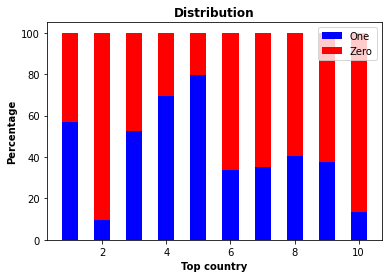

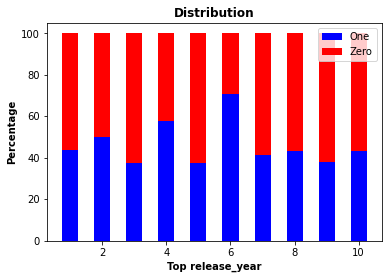

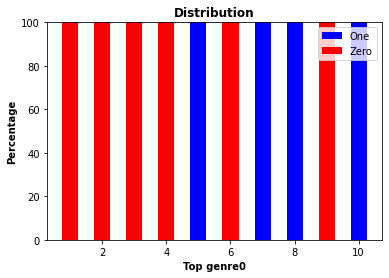

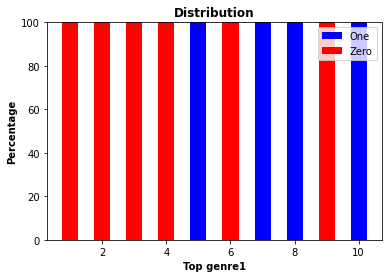

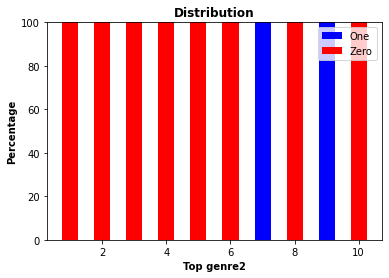

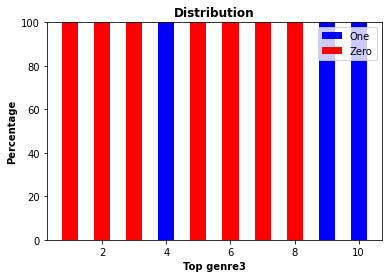

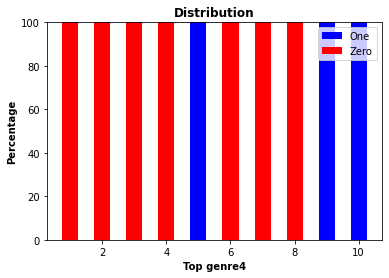

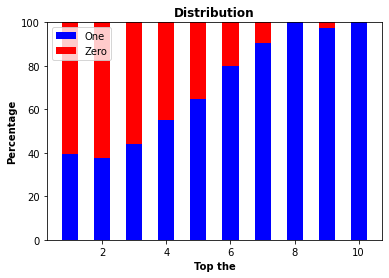

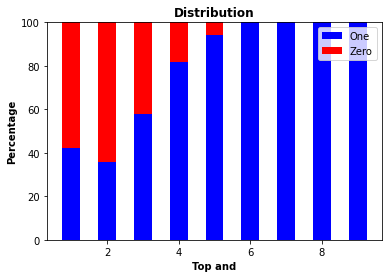

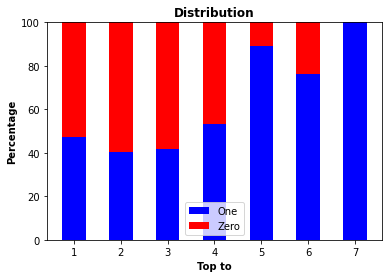

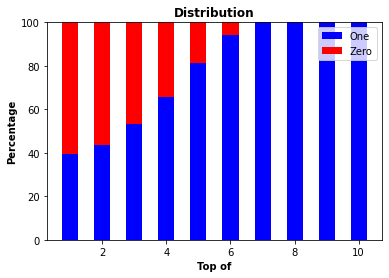

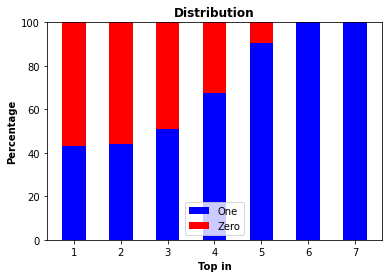

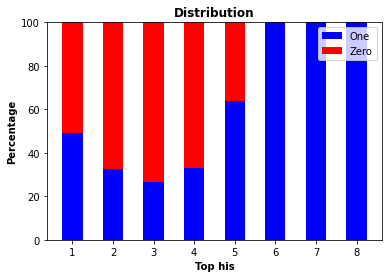

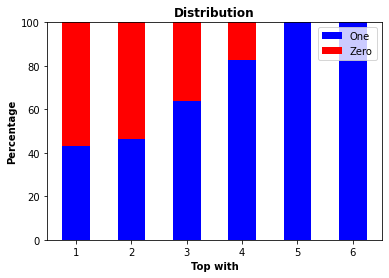

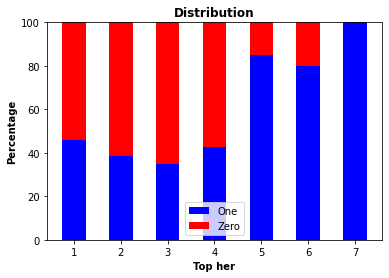

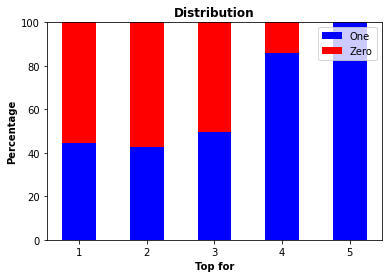

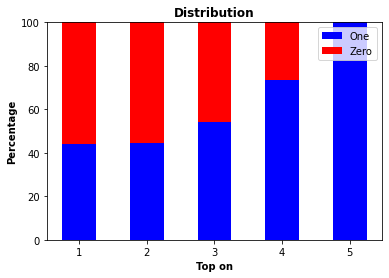

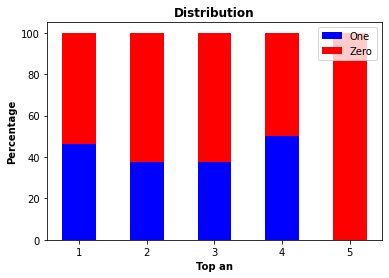

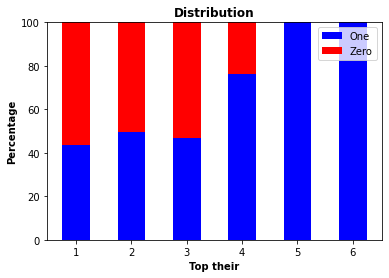

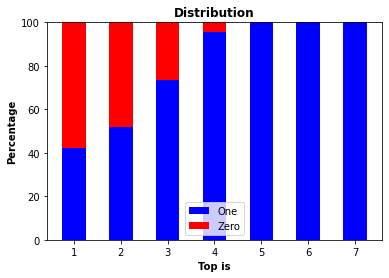

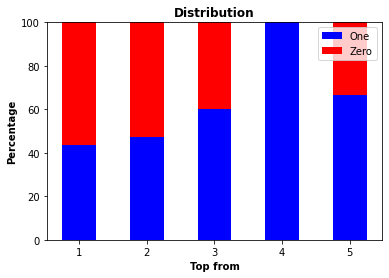

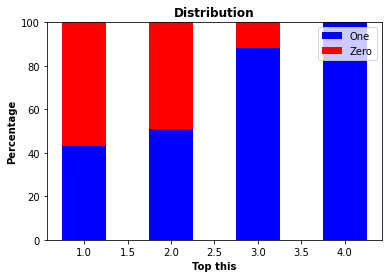

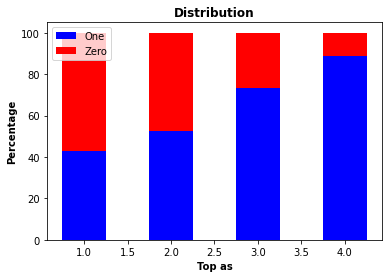

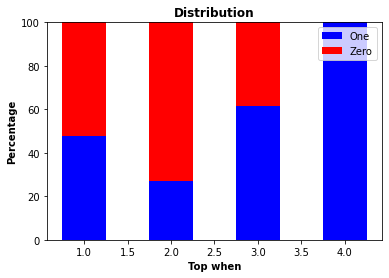

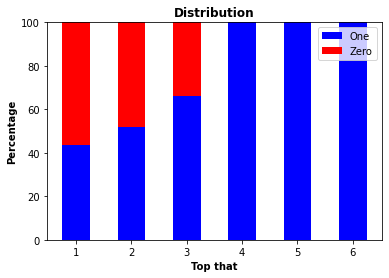

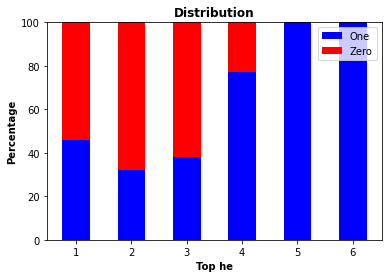

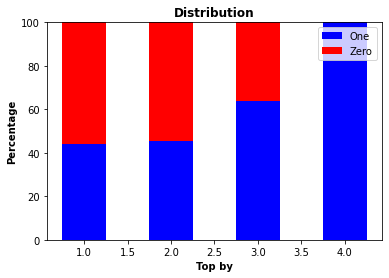

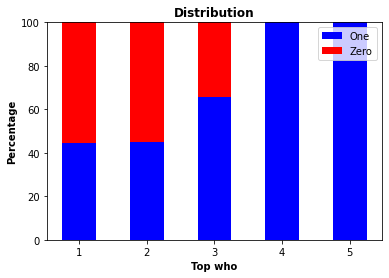

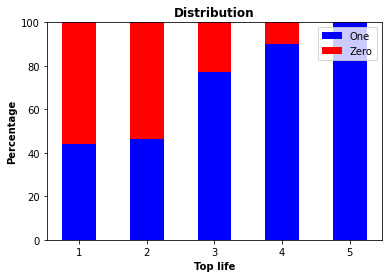

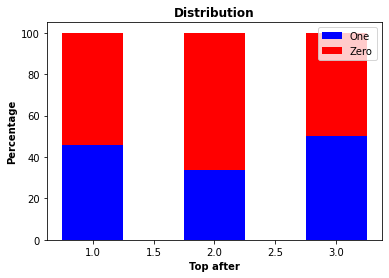

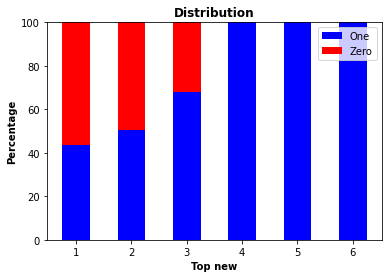

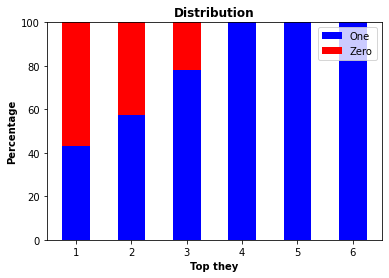

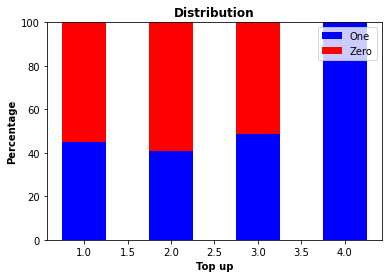

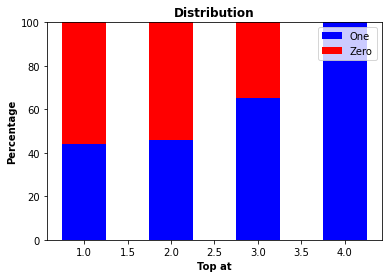

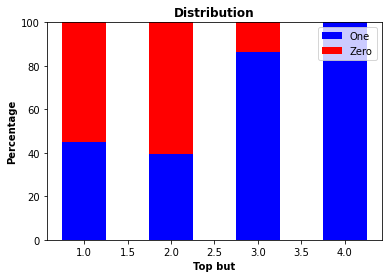

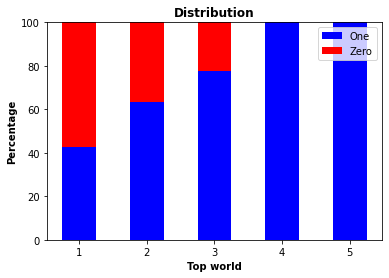

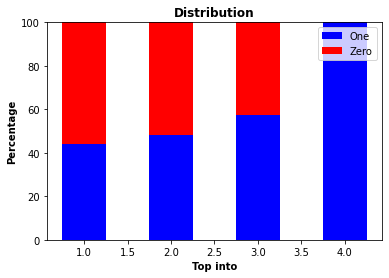

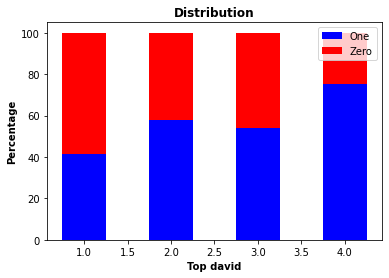

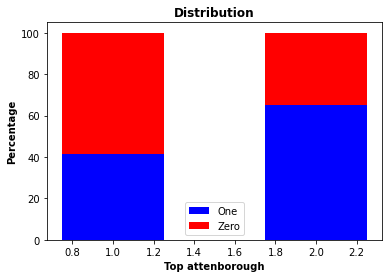

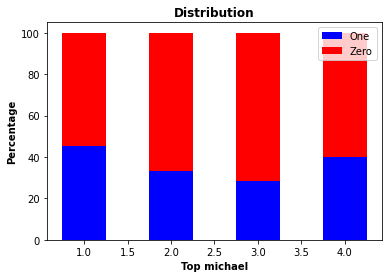

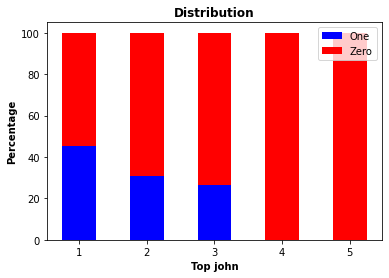

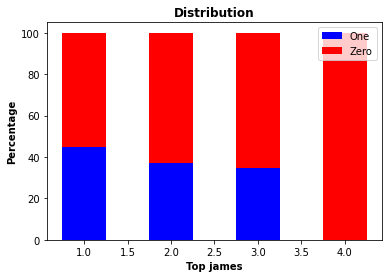

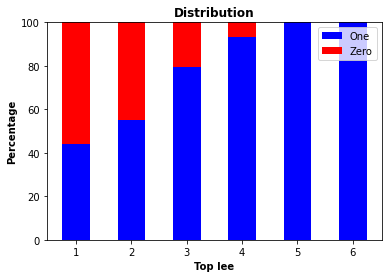

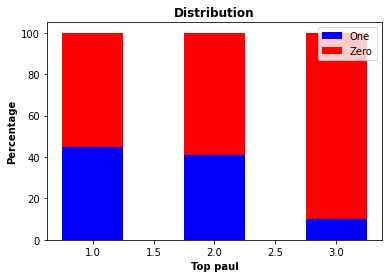

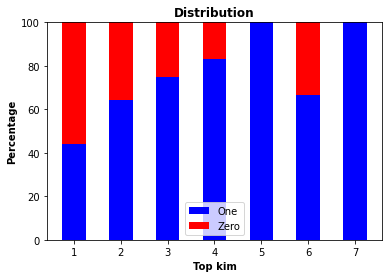

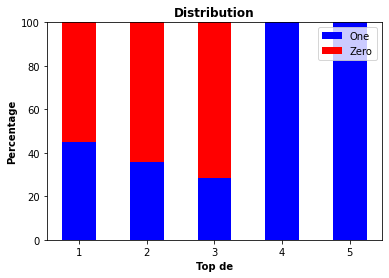

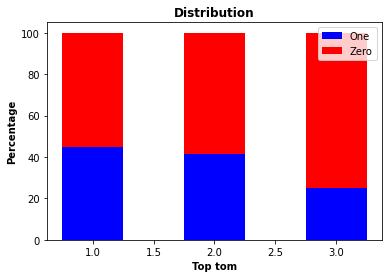

In [41]:
for title in df:
    if(title == "type"):
        continue
    info_df = df[['type', title]]
    info_gain = info_df[title].value_counts()
    dist_df = pd.DataFrame()
    dist_df[title] = info_gain.index
    
    # count number of types values with same title value
    all_ones = []
    all_zeros = []
    for value in info_gain.index:
        all_num = info_df.loc[info_df[title] == value]['type'].count()
        ones = info_df.loc[info_df[title] == value]['type'].sum()
        all_ones.append(ones)
        all_zeros.append(all_num - ones)
    dist_df['one'] = all_ones
    dist_df['zero'] = all_zeros
    
    # normalize distribution data
    limit = 10
    if len(dist_df) < 10:
        limit = len(dist_df)
    normal_dist_df = cp.deepcopy(dist_df[0:limit])
    normal_dist_df['one'] = normal_dist_df['one'].div(dist_df['one'] + dist_df['zero'], axis=0) * 100
    normal_dist_df['zero'] = normal_dist_df['zero'].div(dist_df['one'] + dist_df['zero'], axis=0) * 100
    
    # create plot
    count = list(range(1, limit+1))
    plt.bar(count, normal_dist_df['one'],label="One",color='b',width=.5)
    plt.bar(count, normal_dist_df['zero'], bottom = normal_dist_df['one'],label="Zero", color='r',width=.5)
    plt.legend()
    plt.xlabel('Top ' + title, fontweight ='bold')
    plt.ylabel('Percentage', fontweight ='bold')
    plt.title('Distribution', fontweight ='bold')
    plt.show()
    

### We can see "type" value distribution by each atribute in above plots

## Calculate Information Gain:

### we should calculate Information Entropy first:

In [42]:
ones = df['type'].sum()
all_ = df['type'].count()
zeros = all_ - ones
p_1 = ones / all_
p_0 = zeros / all_
first_entropy = -(p_0 * math.log2(p_0) + p_1 * math.log2(p_1))

In [43]:
first_entropy

0.9914472885406285

In [44]:
max_gain = 0
best_atribute = ""
gain = []
atribute = []
for title in df:
    if(title == "type"):
        continue
    info_df = df[['type', title]]
    info_gain = info_df[title].value_counts()
    dist_df = pd.DataFrame()
    dist_df[title] = info_gain.index
    
    # calculate Entropy by split with title
    Entropys = []
    for value in info_gain.index:
        all_num = info_df.loc[info_df[title] == value]['type'].count()
        ones = info_df.loc[info_df[title] == value]['type'].sum()
        zeros = all_num - ones
        p_1 = ones / all_num
        p_0 = zeros / all_num
        if p_0 > 0 and p_1 > 0:
            entropy = -(p_0 * math.log2(p_0) + p_1 * math.log2(p_1))
        else:
            entropy = 0
        Entropys.append(entropy * all_num / all_)
    entropy = sum(Entropys)
    
    # calculate information gain by split with title
    info_gain = first_entropy - entropy
    gain.append(info_gain)
    atribute.append(title)
    
    # calculate best atribute
    if info_gain > max_gain:
        max_gain = info_gain
        best_atribute = title

In [45]:
info_gain_df = pd.DataFrame()

In [46]:
info_gain_df["atribute"] = atribute
info_gain_df["gain"] = gain

In [47]:
info_gain_df.sort_values("gain", axis = 0, ascending = False, inplace = True)

In [48]:
info_gain_df

,atribute,gain
2,genre0,0.991447
3,genre1,0.991447
4,genre2,0.991447
5,genre3,0.991447
6,genre4,0.991447
0,country,0.179537
8,and,0.051715
7,the,0.043582
1,release_year,0.041065
10,of,0.021134


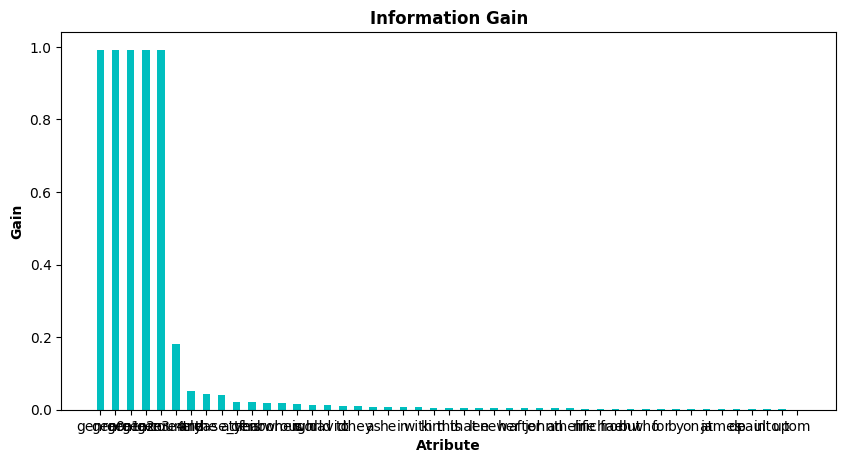

In [49]:
plt.figure(figsize=(10, 5), dpi=100)
plt.bar(info_gain_df['atribute'], info_gain_df['gain'],color='c',width=.5)
plt.xlabel("Atribute", fontweight ='bold')
plt.ylabel("Gain", fontweight ='bold')
plt.title("Information Gain", fontweight ='bold')
plt.show()

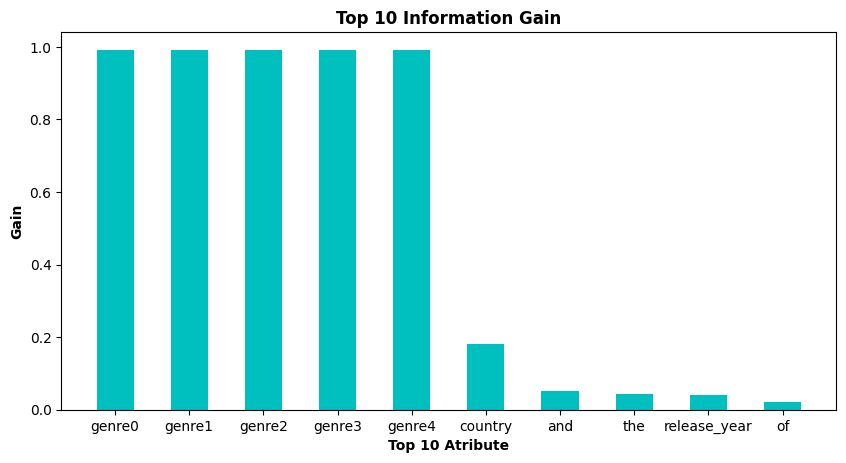

In [50]:
plt.figure(figsize=(10, 5), dpi=100)
plt.bar(info_gain_df['atribute'][0:10], info_gain_df['gain'][0:10],color='c',width=.5)
plt.xlabel("Top 10 Atribute", fontweight ='bold')
plt.ylabel("Gain", fontweight ='bold')
plt.title("Top 10 Information Gain", fontweight ='bold')
plt.show()

### According to the plot above, maximum gain can be gave by genres, so it is better to split data by genres.

In [51]:
best_atribute

'genre0'

# Phase 2 : Predict the Goal and Model Optimization

### devide df for create train datafarme and test dataframe:

In [52]:
# my percentage : 80% Train and 20% Test
train_80p_df = cp.deepcopy(df.iloc[int((len(df)*0.2)):])
test_20p_df = cp.deepcopy(df.iloc[0:int((len(df)*0.2))])
answer_20p = np.array(cp.deepcopy(test_20p_df["type"]))
test_20p_df.drop(labels = "type", axis = 1, inplace = True)

In [53]:
# dataframe with more information :
train_80p_df_mi = cp.deepcopy(df_more_information.iloc[int((len(df)*0.2)):])
test_20p_df_mi = cp.deepcopy(df_more_information.iloc[0:int((len(df)*0.2))])
answer_20p_mi = np.array(cp.deepcopy(test_20p_df_mi["type"]))
test_20p_df_mi.drop(labels = "type", axis = 1, inplace = True)

In [54]:
train_98p_df = cp.deepcopy(df.iloc[int((len(df)*0.02)):])
test_2p_df = cp.deepcopy(df.iloc[0:int((len(df)*0.02))])
answer_2p = np.array(cp.deepcopy(test_2p_df["type"]))
test_2p_df.drop(labels = "type", axis = 1, inplace = True)

In [55]:
train_40p_df = cp.deepcopy(df.iloc[int((len(df)*0.6)):])
test_60p_df = cp.deepcopy(df.iloc[0:int((len(df)*0.6))])
answer_60p = np.array(cp.deepcopy(test_60p_df["type"]))
test_60p_df.drop(labels = "type", axis = 1, inplace = True)

## My model:

In [56]:
dtc = tree.DecisionTreeClassifier(criterion = "entropy")

In [57]:
model_80p = dtc.fit(train_80p_df.drop(labels = "type", axis = 1).values, train_80p_df["type"])

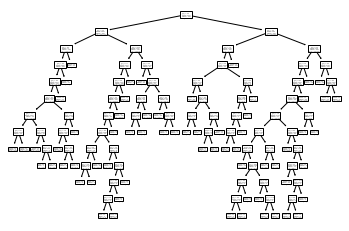

In [58]:
tree.plot_tree(dtc);

In [59]:
predicted = model_80p.predict(np.array(test_20p_df))

In [60]:
num_of_wrong_ans = 0
for i in range(0, len(predicted)):
    if(predicted[i] != answer_20p[i]):
        num_of_wrong_ans += 1
num_of_all_ans = len(predicted)

In [61]:
accuracy = (num_of_all_ans - num_of_wrong_ans) / num_of_all_ans * 100

In [62]:
print("Accuracy of deviding by 80% :", accuracy)

Accuracy of deviding by 80% : 99.36680235187698


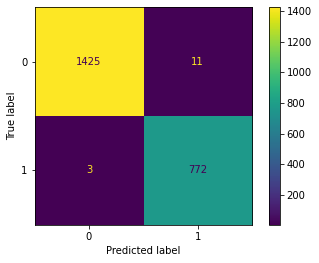

In [63]:
cm = metrics.confusion_matrix(answer_20p, predicted, labels=dtc.classes_)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=dtc.classes_)
disp.plot()
plt.show()

### Up Left sell : number of true preticted 0 values
### Up Right sell : number of 0 values that predicted as 1
### Down Left sell :  number of 1 values that predicted as 0
### Down Right sell : number of true preticted 1 values

In [64]:
print(dtc.max_depth)

None


In [65]:
print(dtc.min_samples_split)

2


In [66]:
parameters = {'criterion' : ['entropy'], 'max_depth' : list(range(1,50)), 'min_samples_split' : list(range(2,10))}
gsc = GridSearchCV(estimator=tree.DecisionTreeClassifier(),param_grid=parameters,cv=5, verbose=0, n_jobs=-1)
gsc.fit(train_80p_df.drop(labels = "type", axis = 1).values, train_80p_df["type"])

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['entropy'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                       13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                       23, 24, 25, 26, 27, 28, 29, 30, ...],
                         'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9]})

In [67]:
gsc.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=47)

In [68]:
md = gsc.best_estimator_.max_depth
mss = gsc.best_estimator_.min_samples_split

In [69]:
print("Best values for max_depth and min_samples_split, in order, are", md, "and", mss, ".")

Best values for max_depth and min_samples_split, in order, are 47 and 2 .


## Optimal model:

In [70]:
dtc = tree.DecisionTreeClassifier(criterion = "entropy", max_depth = md, min_samples_split = mss)

In [71]:
optimal_model_80p = dtc.fit(train_80p_df.drop(labels = "type", axis = 1).values, train_80p_df["type"])

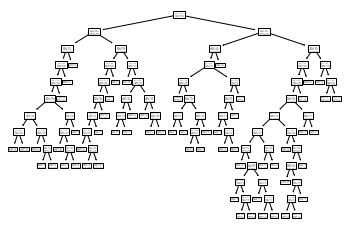

In [72]:
tree.plot_tree(dtc);

In [73]:
predicted = optimal_model_80p.predict(np.array(test_20p_df))

In [74]:
num_of_wrong_ans = 0
for i in range(0, len(predicted)):
    if(predicted[i] != answer_20p[i]):
        num_of_wrong_ans += 1
num_of_all_ans = len(predicted)

In [75]:
optimal_accuracy_80p = (num_of_all_ans - num_of_wrong_ans) / num_of_all_ans * 100

In [76]:
print("Optimal Accuracy of deviding by 80% :", optimal_accuracy_80p)

Optimal Accuracy of deviding by 80% : 99.4572591587517


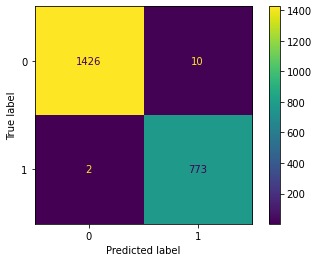

In [77]:
cm = metrics.confusion_matrix(answer_20p, predicted, labels=dtc.classes_)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=dtc.classes_)
disp.plot()
plt.show()

## My Model with More Information:

In [78]:
dtc = tree.DecisionTreeClassifier(criterion = "entropy")

In [79]:
model_80p_mi = dtc.fit(train_80p_df_mi.drop(labels = "type", axis = 1).values, train_80p_df_mi["type"])

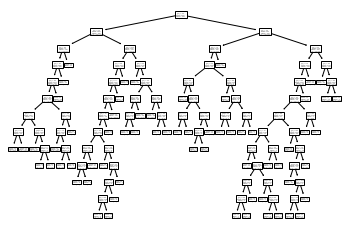

In [80]:
tree.plot_tree(dtc);

In [81]:
predicted = model_80p_mi.predict(np.array(test_20p_df_mi))

In [82]:
num_of_wrong_ans = 0
for i in range(0, len(predicted)):
    if(predicted[i] != answer_20p_mi[i]):
        num_of_wrong_ans += 1
num_of_all_ans = len(predicted)

In [83]:
accuracy_mi = (num_of_all_ans - num_of_wrong_ans) / num_of_all_ans * 100

In [84]:
print("Accuracy of deviding by 80% with more information dataframe :", accuracy_mi)

Accuracy of deviding by 80% with more information dataframe : 99.63817277250114


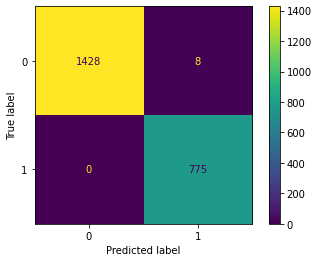

In [85]:
cm = metrics.confusion_matrix(answer_20p_mi, predicted, labels=dtc.classes_)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=dtc.classes_)
disp.plot()
plt.show()

In [86]:
print("Accuracy with more information :", accuracy_mi)
print("normal Accuracy :", accuracy)

Accuracy with more information : 99.63817277250114
normal Accuracy : 99.36680235187698


### According to the above section, more information may caused more accuracy if overfitting doesn't occured and may caused less accuracy if overfitting occures.

## 98 Percent Model:

In [87]:
dtc = tree.DecisionTreeClassifier(criterion = "entropy")

In [88]:
model_98p = dtc.fit(train_98p_df.drop(labels = "type", axis = 1).values, train_98p_df["type"])

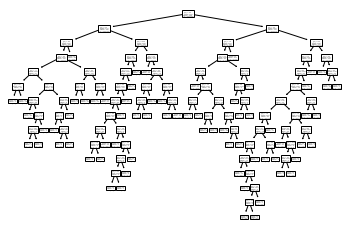

In [89]:
tree.plot_tree(dtc);

In [90]:
predicted = model_98p.predict(np.array(test_2p_df))

In [91]:
num_of_wrong_ans = 0
for i in range(0, len(predicted)):
    if(predicted[i] != answer_2p[i]):
        num_of_wrong_ans += 1
num_of_all_ans = len(predicted)

In [92]:
accuracy_98p = (num_of_all_ans - num_of_wrong_ans) / num_of_all_ans * 100

In [93]:
print("Accuracy of deviding by 98% :", accuracy_98p)

Accuracy of deviding by 98% : 100.0


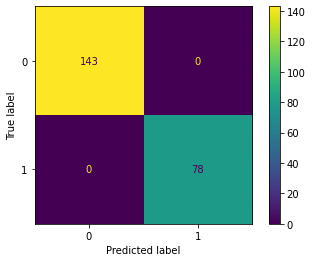

In [94]:
cm = metrics.confusion_matrix(answer_2p, predicted, labels=dtc.classes_)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=dtc.classes_)
disp.plot()
plt.show()

## 40 Percent Model:

In [95]:
dtc = tree.DecisionTreeClassifier(criterion = "entropy")

In [96]:
model_40p = dtc.fit(train_40p_df.drop(labels = "type", axis = 1).values, train_40p_df["type"])

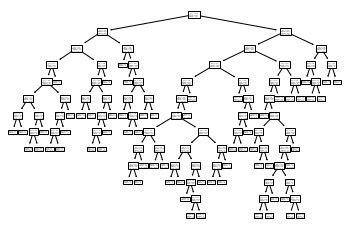

In [97]:
tree.plot_tree(dtc);

In [98]:
predicted = model_40p.predict(np.array(test_60p_df))

In [99]:
num_of_wrong_ans = 0
for i in range(0, len(predicted)):
    if(predicted[i] != answer_60p[i]):
        num_of_wrong_ans += 1
num_of_all_ans = len(predicted)

In [100]:
accuracy_40p = (num_of_all_ans - num_of_wrong_ans) / num_of_all_ans * 100

In [101]:
print("Accuracy of deviding by 40% :", accuracy_40p)

Accuracy of deviding by 40% : 91.65033911077619


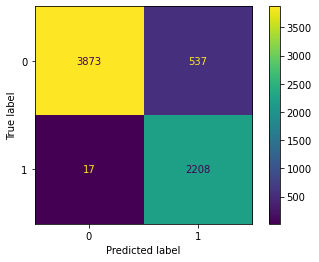

In [102]:
cm = metrics.confusion_matrix(answer_60p, predicted, labels=dtc.classes_)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=dtc.classes_)
disp.plot()
plt.show()

## 1.

### I choose 80 percent for Train and 20 percent for Test because the more train data gave better accuracy.

### If choose 98 percent for Train and 2 percent for Test, because of little Test colection, we gave fake accuracy and can't trust to the accuracy very much.(Is this considered as Overfitting?)

### If choose 40 percent for Train and 60 percent for Test, because of little Train colection, we gave lower accuracy, but because of big Test colection, the accuracy is more reliable.(Is this considered as Underfitting?)

## 2.

In [103]:
max_depth_values = [1, 2, 3, 4, 9, 15, 23, 27, 35, 43, 58, 96, 130]

In [104]:
accuracies = []

for depth in max_depth_values:
    dtc = tree.DecisionTreeClassifier(criterion = "entropy", max_depth = depth)
    model_limited_depth = dtc.fit(train_80p_df.drop(labels = "type", axis = 1).values, train_80p_df["type"])
    predicted = model_limited_depth.predict(np.array(test_20p_df))
    num_of_wrong_ans = 0
    for i in range(0, len(predicted)):
        if(predicted[i] != answer_20p[i]):
            num_of_wrong_ans += 1
    num_of_all_ans = len(predicted)
    curr_accuracy = (num_of_all_ans - num_of_wrong_ans) / num_of_all_ans * 100
    accuracies.append(curr_accuracy)


In [105]:
for i in range(0, len(max_depth_values)):
    print("with depth", max_depth_values[i], "Accuracy will be :", accuracies[i])

with depth 1 Accuracy will be : 83.89868837630031
with depth 2 Accuracy will be : 70.1492537313433
with depth 3 Accuracy will be : 90.54726368159204
with depth 4 Accuracy will be : 92.62777023971054
with depth 9 Accuracy will be : 99.54771596562641
with depth 15 Accuracy will be : 99.72862957937585
with depth 23 Accuracy will be : 99.50248756218906
with depth 27 Accuracy will be : 99.68340117593849
with depth 35 Accuracy will be : 99.4572591587517
with depth 43 Accuracy will be : 99.50248756218906
with depth 58 Accuracy will be : 99.41203075531433
with depth 96 Accuracy will be : 99.63817277250114
with depth 130 Accuracy will be : 99.59294436906377


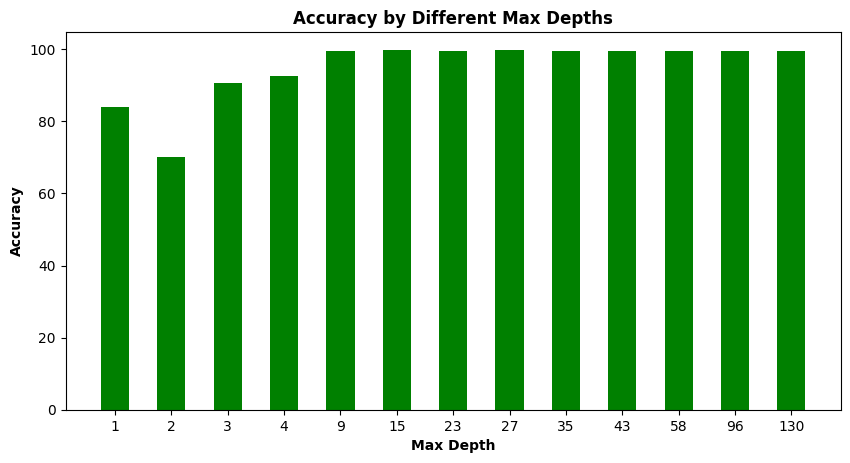

In [106]:
count = list(range(1, len(max_depth_values) + 1))
plt.figure(figsize=(10, 5), dpi=100)
plt.bar(count, accuracies ,color='g',width=.5)
plt.xlabel("Max Depth", fontweight ='bold')
plt.xticks(count, max_depth_values)
plt.ylabel("Accuracy", fontweight ='bold')
plt.title("Accuracy by Different Max Depths", fontweight ='bold')
plt.show()

### with little max_depth, Underfitting occures and accuracy decreased and also, with big max_depth, Overfitting ocuures and accuracy decreased.

# Phase 3 : Prediction with Group Learning

### max_features : The number of features to consider when looking for the best split.

### max_depth : The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.
refrence : https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

In [107]:
RFC = RandomForestClassifier()

In [108]:
RF_model = RFC.fit(train_80p_df.drop(labels = "type", axis = 1).values, train_80p_df["type"])

In [109]:
predicted = RF_model.predict(np.array(test_20p_df))

In [110]:
num_of_wrong_ans = 0
for i in range(0, len(predicted)):
    if(predicted[i] != answer_20p[i]):
        num_of_wrong_ans += 1
num_of_all_ans = len(predicted)

In [111]:
RF_accuracy = (num_of_all_ans - num_of_wrong_ans) / num_of_all_ans * 100

In [112]:
print("Accuracy of Random Forest Algorithm :", RF_accuracy)

Accuracy of Random Forest Algorithm : 96.56264133876074


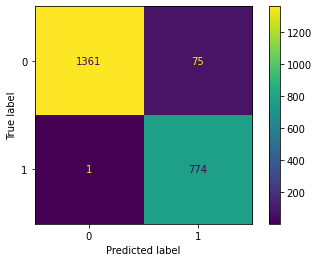

In [113]:
cm = metrics.confusion_matrix(answer_20p, predicted, labels=RFC.classes_)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=RFC.classes_)
disp.plot()
plt.show()

In [114]:
max_depth_values = [2, 5, 23, 54]
max_features_values = [1, 2, 4, 8, 20]

In [115]:
accuracy_list = []
for i in range(0, len(max_depth_values)):
    for j in range(0, len(max_features_values)):
        RFC = RandomForestClassifier(max_depth = max_depth_values[i], max_features = max_features_values[j])
        RF_model = RFC.fit(train_80p_df.drop(labels = "type", axis = 1).values, train_80p_df["type"])
        predicted = RF_model.predict(np.array(test_20p_df))
        num_of_wrong_ans = 0
        for k in range(0, len(predicted)):
            if(predicted[k] != answer_20p[k]):
                num_of_wrong_ans += 1
        num_of_all_ans = len(predicted)
        curr_accuracy = (num_of_all_ans - num_of_wrong_ans) / num_of_all_ans * 100
        accuracy_list.append([i, j, curr_accuracy])

In [116]:
for acc in accuracy_list:
    print("Accuracy of Random Forest Classification with max_depth =", max_depth_values[acc[0]],"and max_features =", max_features_values[acc[1]], "is :", acc[2])

Accuracy of Random Forest Classification with max_depth = 2 and max_features = 1 is : 86.34102216191768
Accuracy of Random Forest Classification with max_depth = 2 and max_features = 2 is : 88.24061510628674
Accuracy of Random Forest Classification with max_depth = 2 and max_features = 4 is : 89.32609678878336
Accuracy of Random Forest Classification with max_depth = 2 and max_features = 8 is : 85.3459972862958
Accuracy of Random Forest Classification with max_depth = 2 and max_features = 20 is : 87.33604703753957
Accuracy of Random Forest Classification with max_depth = 5 and max_features = 1 is : 89.00949796472185
Accuracy of Random Forest Classification with max_depth = 5 and max_features = 2 is : 89.41655359565807
Accuracy of Random Forest Classification with max_depth = 5 and max_features = 4 is : 90.41157847127997
Accuracy of Random Forest Classification with max_depth = 5 and max_features = 8 is : 90.32112166440524
Accuracy of Random Forest Classification with max_depth = 5 and 

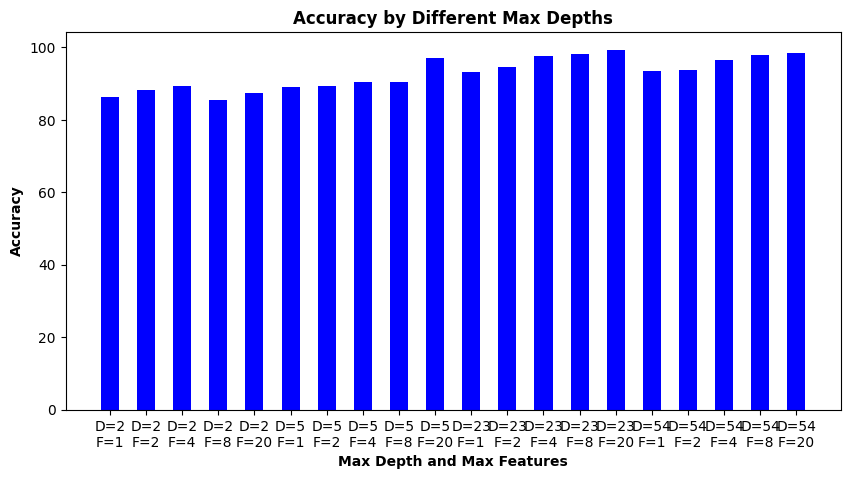

In [117]:
count = list(range(1, len(accuracy_list) + 1))
x_vals = ["D=" + str(max_depth_values[acc[0]]) + "\n" + "F=" + str(max_features_values[acc[1]]) for acc in accuracy_list]
y_vals = [acc[2] for acc in accuracy_list]
plt.figure(figsize=(10, 5), dpi=100)
plt.bar(count, y_vals ,color='b',width=.5)
plt.xlabel("Max Depth and Max Features", fontweight ='bold')
plt.xticks(count, x_vals)
plt.ylabel("Accuracy", fontweight ='bold')
plt.title("Accuracy by Different Max Depths", fontweight ='bold')
plt.show()

### by incresing max_depth and max_features, the accuracy increses too, because in low values of max_depth and max_features, Underfitting occures in each tree and also occures in Random Forest model. In high values of max_depth and max_features, Overfitting occures in each tree and also occures in Random Forest model.

In [118]:
print("Random Forest Accuracy :", RF_accuracy, "\nDecision Tree Accuracy :", accuracy)

Random Forest Accuracy : 96.56264133876074 
Decision Tree Accuracy : 99.36680235187698


### According to the above result, Decision Tree algorithm in this problem and with this dataset, works better than Random Forest algorithm.

## Bias and Variance:

### High Bias means Underfitting and High Variance means Overfitting.

### We want to minimize Tatal Error in our models, that calculated by below formula:

### Total Error = Bias ^ 2 + Variance + Irreducible Error

### If Variance or Bias is high, The Random Forst will be better.
### If Bias and Variance is low, The Decision Tree will be better.

### The last two diagrams, show above facts.